**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


因子一：MACD


MACD的意义和双移动平均线基本相同，即由快、慢均线的离散、聚合表征当前的多空状态和股价可能的发展变化趋势，但阅读起来更方便，属于最容易掌握的信号因子。当MACD从负数转向正数，是买的信号。当MACD从正数转向负数，是卖的信号。当MACD以大角度变化，表示快的移动平均线和慢的移动平均线的差距非常迅速的拉开，代表了一个市场大趋势的转变。

MACD在应用上应先行计算出快速（一般选12日）移动平均值与慢速（一般选26日）移动平均值。以这两个数值作为测量两者（快速与慢速线）间的“差离值”依据。所谓“差离值”（DIF），即12日EMA数值减去26日EMA数值。因此，在持续的涨势中，12日EMA在26日EMA之上。其间的正差离值（+DIF）会愈来愈大。反之在跌势中，差离值可能变负（-DIF），也愈来愈大。至于行情开始回转，正或负差离值要缩小到一定的程度，才真正是行情反转的信号。MACD的反转信号界定为“差离值”的9日移动平均值（9日EMA）。 

In [86]:
#读取所需数据
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '30min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))
dv1H.add_formula('DIF',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True) #计算快线DIF
dv1H.add_formula('DEA',"Ta('EMA',0,0,0,0,DIF,0,9)",add_data=True)#计算DIF的9日加权移动均线DEA
dv1H.add_formula('MACD_Hist',"(DIF-DEA)*2",add_data=True)#计算MACD柱，完成因子构建

Initialize dataview success.


symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


In [87]:
import matplotlib.pyplot as plt
import pandas as pd

#构建绘图函数来表现因子的变化与价格变化之间的关系
def Plot_MACD(dv, MACD_Hist,DIF,DEA,chart_name='dv1H_MACD', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))   #考虑到数据量纲不同，因此绘制2X1子图，并使用同一横轴（时间）
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:],label='Close')#获取收盘价数据
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax.legend()
    ax1.plot(MACD_Hist.iloc[n:],color='blue',alpha=1,label='MACD_Hist')
    ax1.plot(DIF.iloc[n:],color='green',alpha=0.3,label='DIF')
    ax1.plot(DEA.iloc[n:],color='red',alpha=0.3,label='DEA')
    ax1.legend()
    ax1.hlines(0, MACD_Hist.iloc[n:].index[0], MACD_Hist.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加0线作为参考线
    plt.show()


    
DIF=dv1H.get_ts('DIF', date_type='datetime') 
DEA=dv1H.get_ts('DEA', date_type='datetime') 
MACD_Hist=dv1H.get_ts('MACD_Hist', date_type='datetime') 

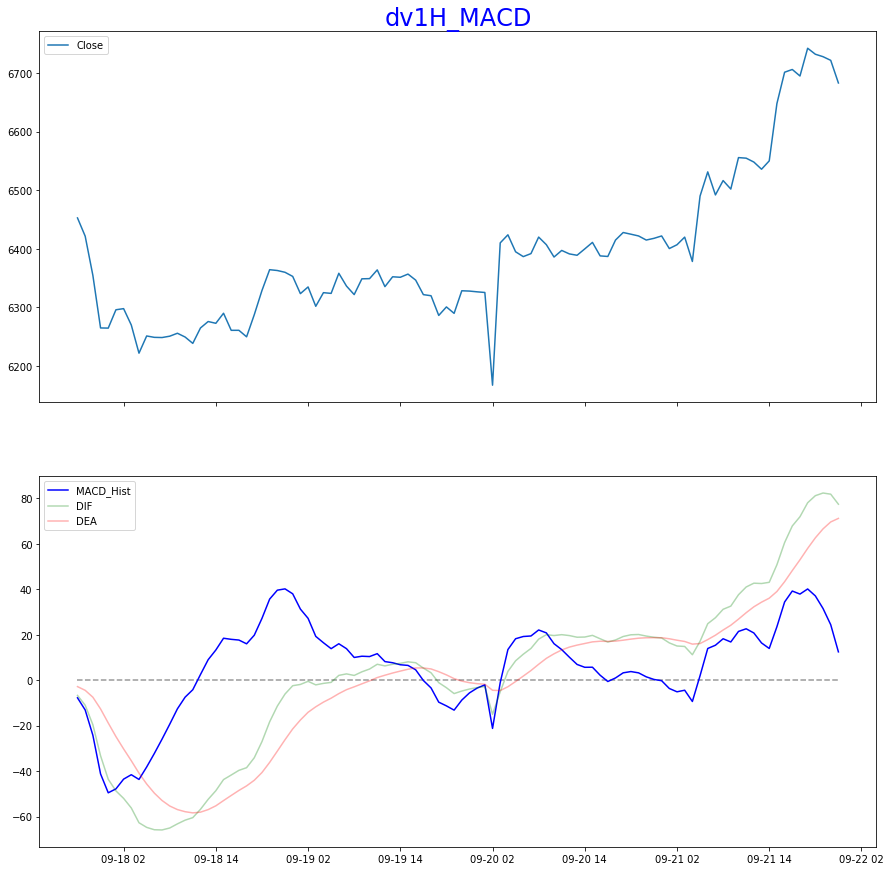

In [88]:
Plot_MACD(dv1H, MACD_Hist.iloc[:,0], DIF.iloc[:,0], DEA.iloc[:,0], n=-100)

通过观察发现MACD与价格的升降有很显而易见的关联。
主要表现为MACD柱（蓝线）上穿0值时出现上涨趋势，下穿0值时出现下跌趋势，可据此设置进出场信号

因子二： CMO
钱德动量摆动指标（Chande Momentum Osciliator，简称CMO）是由图莎尔·钱德（Tushar S.Chande）发明的，与其他动量指标摆动指标如相对强弱指标（RSI）和随机指标（KDJ）不同，钱德动量指标在计算公式的分子中采用上涨日和下跌日的数据。 CMO指标是寻找极度超买和极度超卖的条件。
计算方法：CMO = (SU - SD)/ (SU + SD) * 100.
其中：
SU是今日收盘价与昨日收盘价（上涨日）差值加总。若当日下跌，则增加值为0； 
SD是今日收盘价与昨日收盘价（下跌日）差值的绝对值加总。若当日上涨，则增加值为0。 

CMO作为一个通用规则，把超买水平定量在+50以上，把超卖水平定量在-50以下。
CMO的绝对值日越高，趋势越强。较低的CMO绝对值（0附近）标示标的证券在水平方向波动。在+50，上涨日的动量是下跌日动量的3倍；同样，在-50，下跌日的动量是上涨日动量的3倍。这些水平值可与RSI指标中的70/30相对应。
可以通过用CMO的移动平均线来建立进入和退出规则。可以利用CMO来衡量证券趋势强度的能力，来改进趋势跟踪机制。例如当CMO的绝对值较高时仅根据趋势跟踪指标来操作；当CMO的绝对值较低时转而采用交易范围指标。

参考资料《光大证券-20120814-技术指标系列(七)：CMO动量波动指标的运用.pdf》

In [179]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high_adj,low_adj,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '30Min,4H',
         'start_date':20180601000000}
#通过对不同时间段的数据做测试，结果发现对4H数据采用CMO抓取超买超卖点的策略的胜负比情况较好

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv4H = HFDataView()
dv4H.create_init_dv(Time_dict['4H'].dropna().set_index(["trade_date","symbol"]))
dv4H.add_formula('SU', "Ts_Sum(If(Delta(close,1)>0,close-Delay(close, 1),0),20)" , add_data=True)  #计算SU，N=20
dv4H.add_formula('SD', "Ts_Sum(If(Delta(close,1)<0,Delay(close, 1)-close,0),20)", add_data=True) #计算SD，N=20
CMO_J = dv4H.add_formula('CMO_J', "(SU-SD)/(SU+SD)*100",  add_data=True) #利用SU和SD计算得到CMO数据



import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
def Plot_CMO(dv, CMO_J, SU, SD, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(CMO_J.iloc[-n:], color = 'blue',alpha=1,label='CMO')  
    #由于SU、SD与CMO数据的量纲大小不同，在图上展示后会显示不清，在这里值显示CMO的值
    #ax1.plot(SU.iloc[-n:],color = 'red',alpha=0.3,label='SU')  
    #ax1.plot(SD.iloc[-n:],color = 'green',alpha=0.3,label='SD')
    ax1.legend()
    ax1.hlines(0, CMO_J.iloc[n:].index[0], CMO_J.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加一条0线用于参考
    ax1.hlines(50, CMO_J.iloc[n:].index[0], CMO_J.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加一条50线用于参考，为超买状态
    ax1.hlines(-50, CMO_J.iloc[n:].index[0], CMO_J.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加一条-50线用于参考，为超卖状态
    plt.show()

Initialize dataview success.


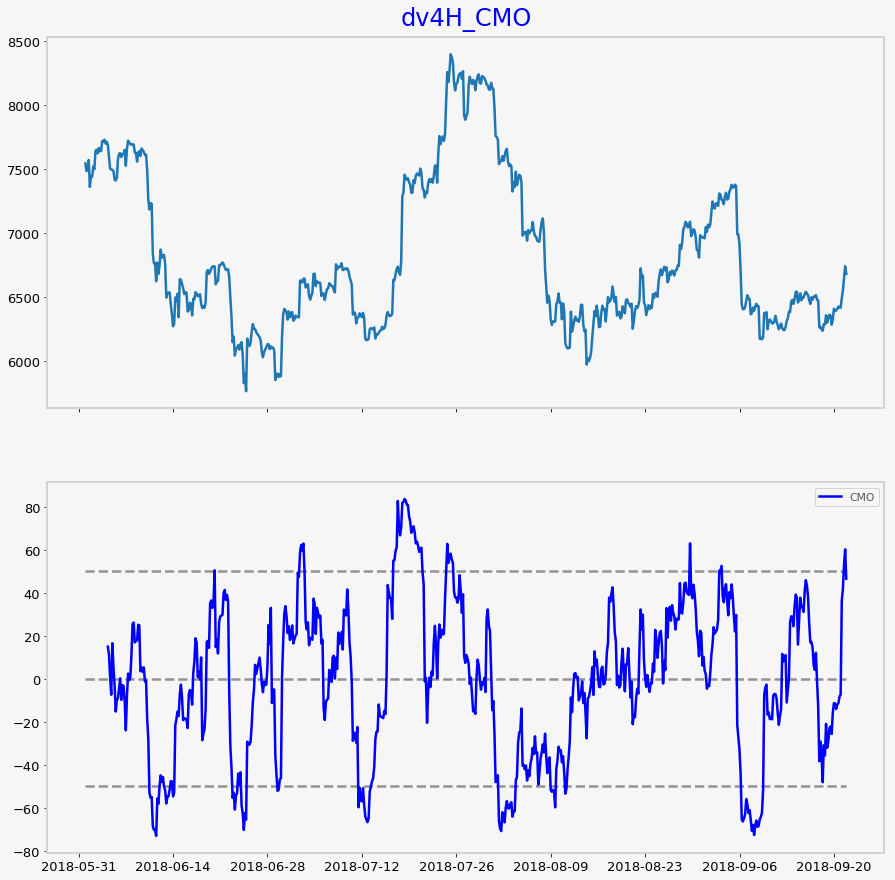

In [181]:
CMO_J=dv4H.get_ts('CMO_J', date_type='datetime') 
SU=dv4H.get_ts('SU', date_type='datetime') 
SD=dv4H.get_ts('SD', date_type='datetime') 
Plot_CMO(dv4H, CMO_J, SU, SD, chart_name='dv4H_CMO', n=0)

就观察来看，CMO线与价格趋势升降的变化关系比MACD相对复杂一些。
有三个关键点位：
-50、0和50三条线，在CMO上穿0线后价格处于上涨趋势，下穿0线后处于下降趋势，与MACD相似；
一直上升直到CMO高过50，为超买信号，意味着上升趋势即将反转；
一直下降直到CMO低过-50，出现超卖信号，意味着下降趋势即将反转；
CMO线作为信号，趋势反映要快于价格线，可以据此编写进出场信号

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

现象回顾：

因子一：MACD
通过观察发现MACD与价格的升降有很显而易见的关联。
主要表现为MACD柱（蓝线）上穿0值时出现上涨趋势，下穿0值时出现下跌趋势，可据此设置进出场信号


因子二：CMO
就观察来看，CMO线与价格趋势升降的变化关系比MACD相对复杂一些。
有三个关键点位：
-50、0和50三条线，在CMO上穿0线后价格处于上涨趋势，下穿0线后处于下降趋势，与MACD相似；
一直上升直到CMO高过50，为超买信号，意味着上升趋势即将反转；
一直下降直到CMO低过-50，出现超卖信号，意味着下降趋势即将翻转；
CMO线作为信号，趋势反映要快于价格线，可以据此编写进出场信号

In [111]:
#进出场信号：MACD
# MACD因子
#进出场条件：
#在MACD线上穿0轴时开多，下穿0轴时平多
#在MACD线下穿0轴时开空，上穿0轴时平空

#设置MACD进出场信号
long = dv1H.add_formula('longMACD','If((MACD_Hist>0) && (Delay(MACD_Hist,1)<=0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((MACD_Hist<=0) && (Delay(MACD_Hist,1)>0),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)


Field [shortMACD] is overwritten.
Field [closeLongMACD] is overwritten.
Field [closeShortMACD] is overwritten.


In [183]:
#进出场信号：CMO
#进出场条件：
#只抓取超买超买点，减少交易次数
#在CMO线上穿-50线时开多，下穿50时时平多
#在CMO线下穿50线时开空，上穿-50线时平空
long = dv4H.add_formula('longCMO','If(((CMO_J>-50) && (Delay(CMO_J,1)<=-50)),2,0)',add_data = True)    
short = dv4H.add_formula('shortCMO','If(((CMO_J<50) && (Delay(CMO_J,1)>=50)),-2,0)',add_data = True)  
#出场信号
close_long = dv4H.add_formula('closeLongCMO','If(longCMO==-2,1,0)',add_data = True)
close_short = dv4H.add_formula('closeShortCMO','If(shortCMO==2,-1,0)',add_data = True)



Field [longCMO] is overwritten.
Field [shortCMO] is overwritten.
Field [closeLongCMO] is overwritten.
Field [closeShortCMO] is overwritten.


# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


In [90]:
#输出MACD绩效
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               7.697 -15.482   0.047
p-value              0.000   0.000   0.963
mean                 0.050  -0.045   0.000
std                  0.043   0.020   0.058
info_ratio           1.160  -2.235   0.005
skewness             1.772   0.952   0.941
kurtosis             2.672  -0.238   0.813
pct5                 0.009  -0.067  -0.064
pct25                0.024  -0.057  -0.053
pct50                0.035  -0.053  -0.002
pct75                0.048  -0.030   0.035
pct95                0.136  -0.003   0.106
occurance           45.000  49.000  94.000
win_ratio              NaN     NaN   0.479
win_mean/loss_mean     NaN     NaN   1.102
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               8.904 -20.966   0.362
p-value       

从统计量中可以看出，MACD作为因子在统计意义上是显著的（p值接近0），但仅通过MACD上下穿过0值来进行买入卖出的效果也仅仅是差强人意，win ratio略高于0.4，win/lose的mean之比略大于1。主要原因可能是因为MACD作为均线类指标，具有比较严重的滞后性，虽然可以预示价格趋势，但很难确定趋势的发生和持续时间，另外，数据的选取以1H为单位，MACD表现出来的主要是长期趋势，因此在进出场点中会出现很多空值，这是由于数据的选取造成的。总的来讲仅以MACD来进行买卖，效果并不是太好。

In [184]:
#输出CMO因子绩效，操作与MACD类似
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdCMO = TimingDigger(output_folder='.', output_format='pdf', signal_name='CMO_J')
TimingSignal(tdCMO, dv4H, 'longCMO', 'shortCMO', 'closeLongCMO', 'closeShortCMO', mhp=100, sl=0.05, sp=0.3)



Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%


In [185]:
tdCMO.create_event_report(sig_type="long")
tdCMO.create_event_report(sig_type="short")
tdCMO.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              2.502 -73.058   0.710
p-value             0.088   0.000   0.496
mean                0.152  -0.054   0.029
std                 0.105   0.002   0.120
info_ratio          1.445 -32.672   0.237
skewness            0.682   0.510   1.348
kurtosis           -0.894  -1.499   0.691
pct5                0.047  -0.055  -0.055
pct25               0.103  -0.055  -0.054
pct50               0.126  -0.054  -0.051
pct75               0.175  -0.052   0.103
pct95               0.292  -0.051   0.234
occurance           4.000   6.000  10.000
win_ratio             NaN     NaN   0.400
win_mean/loss_mean    NaN     NaN   2.830
*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              2.446 -4.208  0.780
p-value             0.092  0.052  0.465
mean                0.121 -0.074  0.037
std                 0.086  0.025  0.117
info_ratio          1.412 -2.976  0.318
skewness          

通过不断改变数据周期长度进行测试，发现对于CMO因子而言，通过超买超卖信号来确定价格趋势效果较好。当CMO超过50，出现了超买信号，意味着价格过分高估，上升空间匮乏，已显示出疲软趋势，进而当CMO向下变化下穿超买线时，说明市场已经开始做出反应，将会迎来一波下降，因此选择CMO下穿50线时看空；同理，当CMO跌破-50，出现了超卖信号，意味着价格过分低估，呈现触底反弹的趋势，因此当CMO重新向上穿破超卖线时，意味着市场开始做出反应，将迎来一波上升，因此选择CMO上穿-50线时看多，这与MACD的多空逻辑有所不同。

从绩效来看，CMO抓取超买超卖点的交易次数远远小于MACD的交易次数，因为本身超买超卖并非高频率事件；但一旦抓住了这一类信号，就可以很好推断价格的走势；win_ratio也超过了0.4，甚至在看空中达到了0.57，表现突出。

为探究因子的通用性，使用EOSUSDT：binance来测试上述因子与策略在另一组数据中的效果

In [188]:
#因子一：MACD
#读取所需数据
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'EOSUSDT:binance',
         'freq': '30min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))
dv1H.add_formula('DIF',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True) #计算快线DIF
dv1H.add_formula('DEA',"Ta('EMA',0,0,0,0,DIF,0,9)",add_data=True)#计算DIF的9日加权移动均线DEA
dv1H.add_formula('MACD_Hist',"(DIF-DEA)*2",add_data=True)#计算MACD柱，完成因子构建

Initialize dataview success.


symbol,EOSUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


In [189]:
import matplotlib.pyplot as plt
import pandas as pd

#构建绘图函数来表现因子的变化与价格变化之间的关系
def Plot_MACD(dv, MACD_Hist,DIF,DEA,chart_name='dv1H_MACD', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))   #考虑到数据量纲不同，因此绘制2X1子图，并使用同一横轴（时间）
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:],label='Close')#获取收盘价数据
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax.legend()
    ax1.plot(MACD_Hist.iloc[n:],color='blue',alpha=1,label='MACD_Hist')
    ax1.plot(DIF.iloc[n:],color='green',alpha=0.3,label='DIF')
    ax1.plot(DEA.iloc[n:],color='red',alpha=0.3,label='DEA')
    ax1.legend()
    ax1.hlines(0, MACD_Hist.iloc[n:].index[0], MACD_Hist.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加0线作为参考线
    plt.show()


    
DIF=dv1H.get_ts('DIF', date_type='datetime') 
DEA=dv1H.get_ts('DEA', date_type='datetime') 
MACD_Hist=dv1H.get_ts('MACD_Hist', date_type='datetime') 

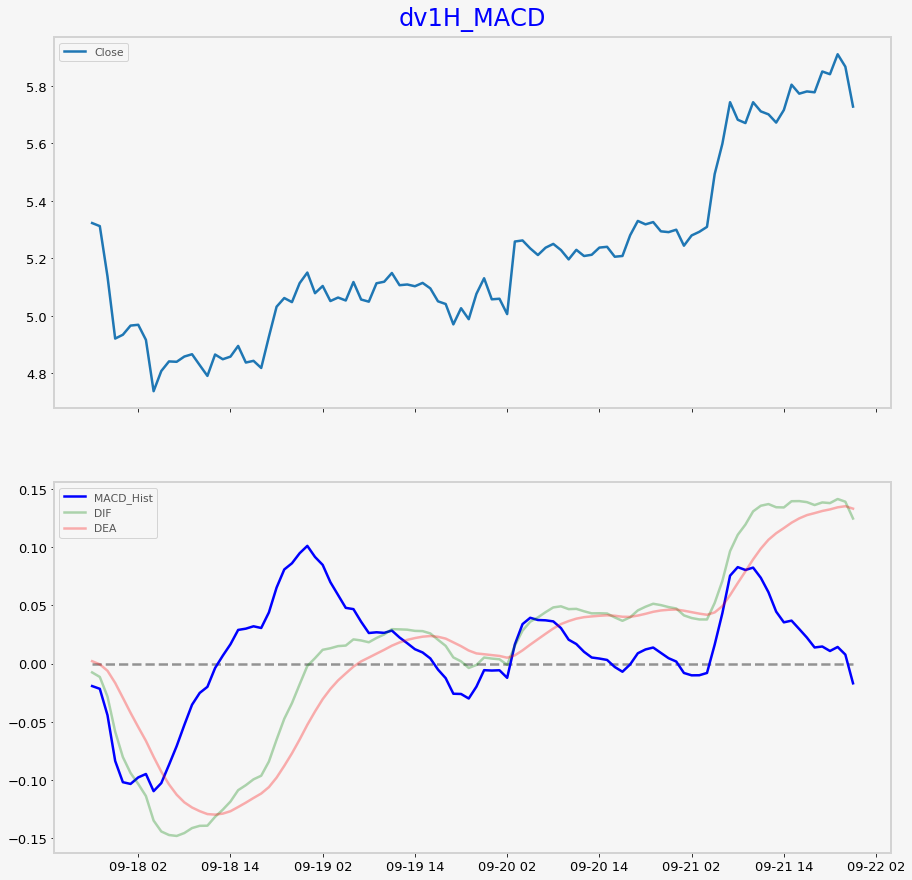

In [190]:
Plot_MACD(dv1H, MACD_Hist.iloc[:,0], DIF.iloc[:,0], DEA.iloc[:,0], n=-100)

通过观察发现MACD与价格的升降有很显而易见的关联。与在BTCUSDT中情况相同
依然表现为MACD柱（蓝线）上穿0值时出现上涨趋势，下穿0值时出现下跌趋势，故可使用相同策略

In [191]:
#进出场信号：MACD
# MACD因子
#进出场条件：
#在MACD线上穿0轴时开多，下穿0轴时平多
#在MACD线下穿0轴时开空，上穿0轴时平空

#设置MACD进出场信号
long = dv1H.add_formula('longMACD','If((MACD_Hist>0) && (Delay(MACD_Hist,1)<=0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((MACD_Hist<=0) && (Delay(MACD_Hist,1)>0),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)



In [192]:
#输出MACD绩效
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               7.084 -29.458  -0.185
p-value              0.000   0.000   0.854
mean                 0.124  -0.060  -0.002
std                  0.089   0.015   0.100
info_ratio           1.389  -3.868  -0.020
skewness             0.591   0.924   1.565
kurtosis            -0.838   3.484   1.438
pct5                 0.017  -0.084  -0.081
pct25                0.058  -0.067  -0.062
pct50                0.085  -0.060  -0.054
pct75                0.198  -0.054   0.046
pct95                0.286  -0.034   0.229
occurance           27.000  59.000  86.000
win_ratio              NaN     NaN   0.314
win_mean/loss_mean     NaN     NaN   2.079
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               8.778 -26.671   2.417
p-value       

从绩效来看，依然表现平平，甚至在看多策略中win_ratio仅有0.3, 看空为0.489，相对好一些。可以尝试更换数据来得到不同的结果

In [195]:
#因子二：CMO
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high_adj,low_adj,close,volume',
         'symbol': 'EOSUSDT:binance',
         'freq': '30Min,4H',
         'start_date':20180601000000}
#通过对不同时间段的数据做测试，结果发现对4H数据采用CMO抓取超买超卖点的策略的胜负比情况较好

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv4H = HFDataView()
dv4H.create_init_dv(Time_dict['4H'].dropna().set_index(["trade_date","symbol"]))
dv4H.add_formula('SU', "Ts_Sum(If(Delta(close,1)>0,close-Delay(close, 1),0),20)" , add_data=True)  #计算SU，N=20
dv4H.add_formula('SD', "Ts_Sum(If(Delta(close,1)<0,Delay(close, 1)-close,0),20)", add_data=True) #计算SD，N=20
CMO_J = dv4H.add_formula('CMO_J', "(SU-SD)/(SU+SD)*100",  add_data=True) #利用SU和SD计算得到CMO数据



import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
def Plot_CMO(dv, CMO_J, SU, SD, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(CMO_J.iloc[-n:], color = 'blue',alpha=1,label='CMO')  
    #由于SU、SD与CMO数据的量纲大小不同，在图上展示后会显示不清，在这里值显示CMO的值
    #ax1.plot(SU.iloc[-n:],color = 'red',alpha=0.3,label='SU')  
    #ax1.plot(SD.iloc[-n:],color = 'green',alpha=0.3,label='SD')
    ax1.legend()
    ax1.hlines(0, CMO_J.iloc[n:].index[0], CMO_J.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加一条0线用于参考
    ax1.hlines(50, CMO_J.iloc[n:].index[0], CMO_J.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加一条50线用于参考，为超买状态
    ax1.hlines(-50, CMO_J.iloc[n:].index[0], CMO_J.iloc[n:].index[-1], alpha=0.4, linestyle='--') #添加一条-50线用于参考，为超卖状态
    plt.show()

Initialize dataview success.


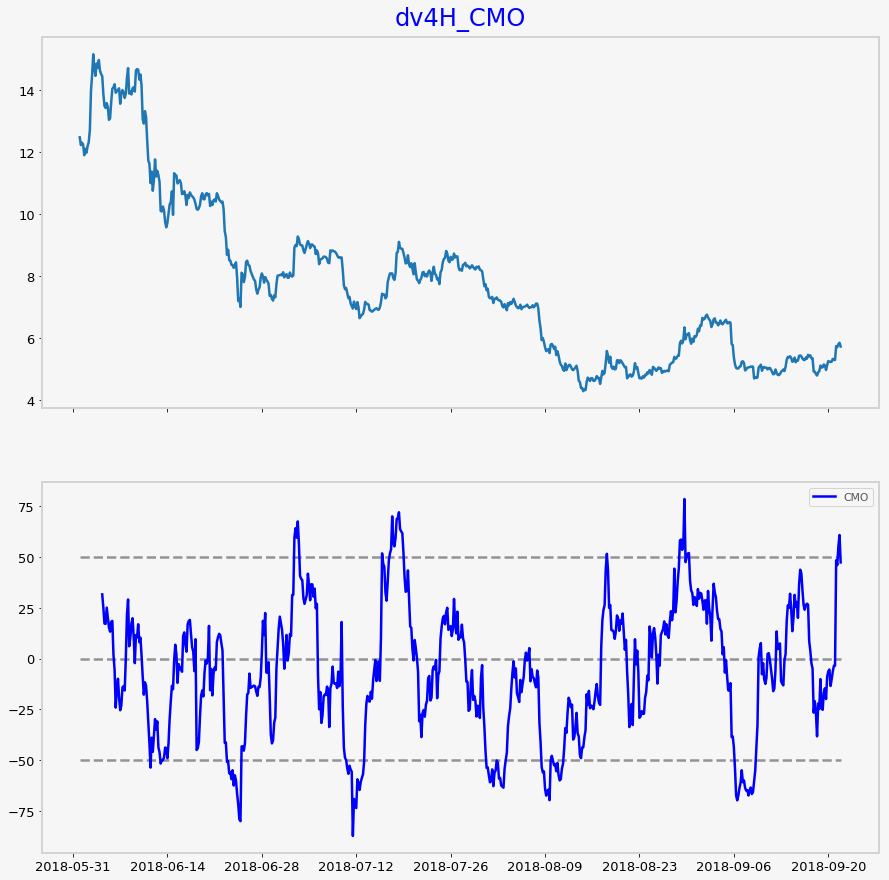

In [196]:
CMO_J=dv4H.get_ts('CMO_J', date_type='datetime') 
SU=dv4H.get_ts('SU', date_type='datetime') 
SD=dv4H.get_ts('SD', date_type='datetime') 
Plot_CMO(dv4H, CMO_J, SU, SD, chart_name='dv4H_CMO', n=0)

从时序图来看，价格呈现下跌趋势，而CMO所呈现的超买超卖信号要比BTCUSDT更多，似乎失去了因子的信号功能，下面依然尝试相同的策略

In [197]:
#进出场信号：CMO
#进出场条件：
#只抓取超买超买点，减少交易次数
#在CMO线上穿-50线时开多，下穿50时时平多
#在CMO线下穿50线时开空，上穿-50线时平空
long = dv4H.add_formula('longCMO','If(((CMO_J>-50) && (Delay(CMO_J,1)<=-50)),2,0)',add_data = True)    
short = dv4H.add_formula('shortCMO','If(((CMO_J<50) && (Delay(CMO_J,1)>=50)),-2,0)',add_data = True)  
#出场信号
close_long = dv4H.add_formula('closeLongCMO','If(longCMO==-2,1,0)',add_data = True)
close_short = dv4H.add_formula('closeShortCMO','If(shortCMO==2,-1,0)',add_data = True)




In [198]:
#输出CMO因子绩效，操作与MACD类似
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdCMO = TimingDigger(output_folder='.', output_format='pdf', signal_name='CMO_J')
TimingSignal(tdCMO, dv4H, 'longCMO', 'shortCMO', 'closeLongCMO', 'closeShortCMO', mhp=100, sl=0.05, sp=0.3)




Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%


In [199]:
tdCMO.create_event_report(sig_type="long")
tdCMO.create_event_report(sig_type="short")
tdCMO.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                         win   loss    all
t-stat                   NaN -8.803 -1.478
p-value                  NaN  0.000  0.183
mean                0.170000 -0.078 -0.047
std                 0.000000  0.022  0.084
info_ratio               inf -3.594 -0.558
skewness            0.000000 -0.500  2.002
kurtosis           -3.000000 -1.441  2.515
pct5                0.170000 -0.109 -0.109
pct25               0.170000 -0.097 -0.091
pct50               0.170000 -0.066 -0.064
pct75               0.170000 -0.061 -0.059
pct95               0.170000 -0.056  0.091
occurance           1.000000  7.000  8.000
win_ratio                NaN    NaN  0.125
win_mean/loss_mean       NaN    NaN  2.172
*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              2.180 -6.327 -0.423
p-value             0.274  0.008  0.690
mean                0.117 -0.088 -0.020
std                 0.054  0.024  0.104
info_ratio          2.180 -3.653 -0.189
sk

In [ ]:
从绩效看，无论是看多还是看空，都是loss大于win，可见适用于BTCUSDT的CMO策略在EOSUSDT上使用效果就变得很差。
因此，通过CMO抓取超买超卖点的策略的适用性比MACD差。
但上述对比都是在同一数据时间长度下，或许在变更参数之后会有不同的效果。

变更参数后的测试绩效详见第二个文件